<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: A multivariate dataset on ENSO</h1>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### ENSO science from data 
1. <a href="#import">Importing data</a>
1. <a href="#matrix">Covariance matrix stuff</a>

<a name="import"></a>
### Import our dataset (in current directory)

In [19]:
import numpy as np
from netCDF4 import Dataset

datafile = Dataset('Eq_timelon_sections.nc',mode='r')

# Trick: a loop over keys, building a command. Then, execute that command!

for key in datafile.variables.keys(): 
    print( key +"=datafile['"+key+"'][:].squeeze()") # to show the command
    exec( key +"=datafile['"+key+"'][:].squeeze()")
datafile.close()

lon=datafile['lon'][:].squeeze()
time=datafile['time'][:].squeeze()
olr=datafile['olr'][:].squeeze()
precip=datafile['precip'][:].squeeze()
slp=datafile['slp'][:].squeeze()
sst=datafile['sst'][:].squeeze()
uwnd=datafile['uwnd'][:].squeeze()


Populating the interactive namespace from numpy and matplotlib


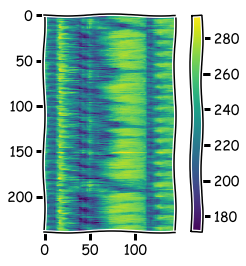

In [47]:
%pylab inline
plt.xkcd() # whiteboard style

imshow(olr); colorbar()

<a name="import"></a>
## Construct and display cov matrices

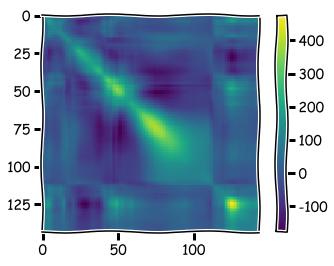

In [51]:
cormat = np.corrcoef( np.transpose(olr) )
covmat = np.cov( np.transpose(olr) )
                     
imshow(covmat)
colorbar()

In [40]:
np.linalg.matrix_rank(covmat)

144

143

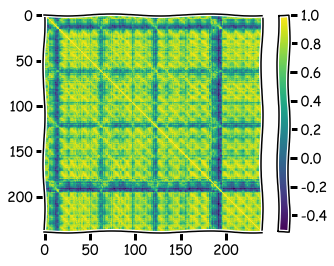

In [45]:
cormat = np.corrcoef(olr)
covmat = np.cov(olr)

imshow(cormat)
colorbar()
np.linalg.matrix_rank(covmat)

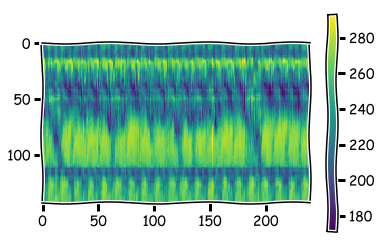

In [50]:
imshow(olr.transpose()); colorbar()

In [11]:
# Rename time to something that will not collide with "time" 
yyyy = 1980.0 + (time + 0.5)/12. # 0.5 is the center of each month

### This command is just like Matlab: WHO'S IN THERE?  
##### But it must be at the TOP of its cell.

In [12]:
whos

Variable   Type       Data/Info
-------------------------------
CPAC       ndarray    240x1: 240 elems, type `float32`, 960 bytes
Dataset    type       <class 'netCDF4._netCDF4.Dataset'>
EPAC       ndarray    240x1: 240 elems, type `float32`, 960 bytes
calmos     ndarray    12: 12 elems, type `int64`, 96 bytes
datafile   Dataset    <object with id 4662369880 (str() failed)>
imo        int64      11
key        str        uwnd
lon        ndarray    144: 144 elems, type `float32`, 576 bytes
months     ndarray    240: 240 elems, type `int64`, 1920 bytes
olr        ndarray    240x144: 34560 elems, type `float32`, 138240 bytes (135.0 kb)
precip     ndarray    240x144: 34560 elems, type `float32`, 138240 bytes (135.0 kb)
slp        ndarray    240x144: 34560 elems, type `float32`, 138240 bytes (135.0 kb)
sst        ndarray    240x144: 34560 elems, type `float32`, 138240 bytes (135.0 kb)
time       ndarray    240: 240 elems, type `float32`, 960 bytes
uwnd       ndarray    240x144: 34560 elems, 